# Vision Transformer for multiclass Plant Seedlings Classification

## Summary
This work consists in a dataset preparation, training, and evaluation of an image classification system based on the vision transformer (ViT) architecture from [An Image is Worth 16x16 Words: Transformers for Image Recognition at Scale](https://arxiv.org/abs/2010.11929) paper. The dataset was extracted from the [Plant Seedlings Classification kaggle](https://www.kaggle.com/c/plant-seedlings-classification) challenge.

During the first part of the task, a classical multilabel classification was applied with no additional preprocessing to the input data. In the second part, a new dataset was constructed using Zero Shot Segmentation in order to get rid of background features and focus the feature extraction only on the plants present in each image.


## Requirements

Install `python 3.9.20` create a virtual env and execute:

```
pip install requirements.txt
```

## Data preparation
The dataset provided by Kaggle has the following structure:
```
plant-seedlings-classification
├── test
└── train
    ├── Black-grass
    ├── Charlock
    ├── Cleavers
    ├── Common Chickweed
    ├── Common wheat
    ├── Fat Hen
    ├── Loose Silky-bent
    ├── Maize
    ├── Scentless Mayweed
    ├── Shepherds Purse
    ├── Small-flowered Cranesbill
    └── Sugar beet
```
> NOTE: The data from the original `test` folder was excluded from the final dataset since it only contains unlabeled images.

The dataset contains 4750 images distributed accross 12 categories: 
1. Black-grass
1. Shepherds Purse
1. Maize
1. Cleavers
1. Sugar beet
1. Fat Hen
1. Common wheat
1. Scentless Mayweed
1. Charlock
1. Small-flowered Cranesbill
1. Loose Silky-bent
1. Common Chickweed

For simplicity the dataset was restructured moving all images in a single folder and keeping a `.csv` file with image names and classes:

```
6a4ef17c2.png,Cleavers
0515bc601.png,Cleavers
0ac327873.png,Cleavers
...
```

In order to achieve this we have `create_dataset.py` script:

In [5]:
%run ./utils/create_dataset.py -d ./plant-seedlings-classification/train -c ./data/all_images.csv -of ./data/images

4750 images moved



This will generate the csv file mentioned above and will move all the images from the subfolders to a single directory.

> You can also download this dataset from [here](https://drive.google.com/file/d/1CcgEuF7Ayp0yWcqYf0GZeZ729rGwv04o/view?usp=sharing) and extract it into the root of this repository to reproduce all the experiments.



#### Lets check how many classes we have and how the labels are distributed

Total images: 4750
Total classes: 12
Black-grass
Shepherds Purse
Maize
Cleavers
Sugar beet
Fat Hen
Common wheat
Scentless Mayweed
Charlock
Small-flowered Cranesbill
Loose Silky-bent
Common Chickweed


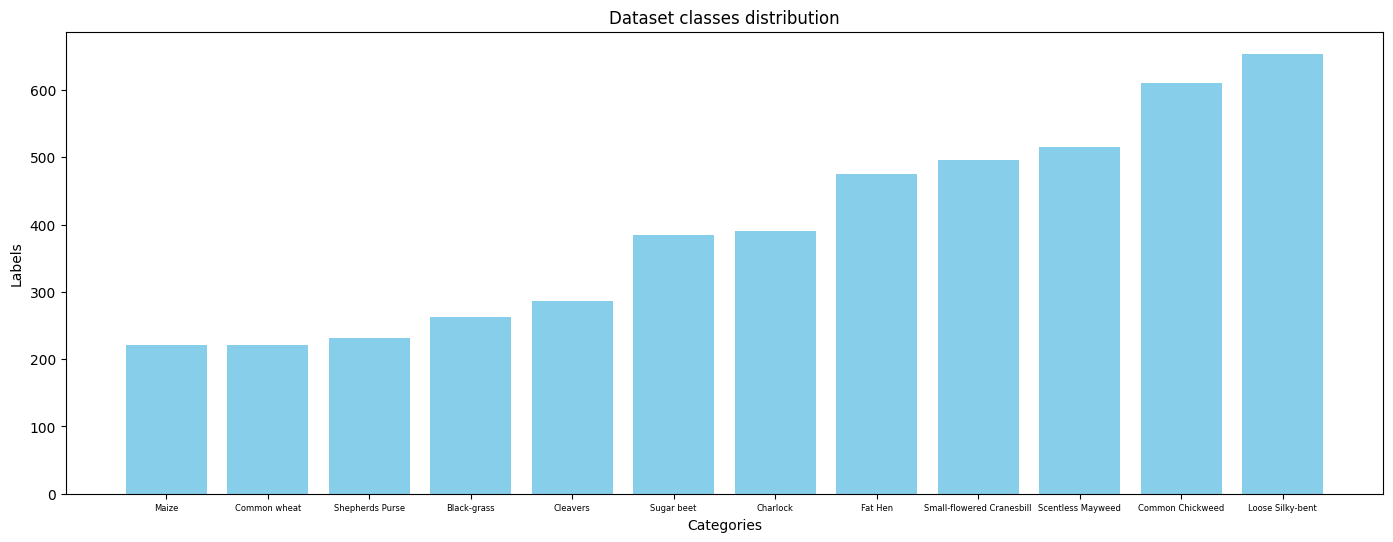

In [8]:
import pandas as pd
from matplotlib import pyplot as plt

LABEL_COLUMN = 1

CSV_PATH = './data/all_images.csv'
dataset_pd = pd.read_csv(CSV_PATH, header=None)

labels = set(dataset_pd[LABEL_COLUMN])
print(f'Total images: {len(dataset_pd)}')
print(f'Total classes: {len(labels)}')
print(*labels, sep='\n')

stats = {label:len(dataset_pd.loc[dataset_pd[LABEL_COLUMN]==label]) 
    for label in labels}
stats = dict(sorted(stats.items(), key=lambda item: item[1]))

labels = list(stats.keys())
quantity = list(stats.values())

plt.figure(figsize=(17, 6))
plt.bar(labels, quantity, color='skyblue')
plt.xlabel('Categories')
plt.ylabel('Labels')
plt.title('Dataset classes distribution')
plt.xticks(fontsize=6)
plt.show()



## Stage 1: Model training

According to [An Image is Worth 16x16...](https://arxiv.org/abs/2010.11929) Vision Transformer attains excellent results compared to state-of-the-art convolutional networks while requiring fewer resources to train. That's why the smallest ViT model from the family was selected for this task in order to validate the idea and keep the GPU hours low.

Used models:
    
* vit-tiny-patch16-224

To train a model run:

In [6]:
%run train.py -if ./data/all_images.csv -d ./data/images -e vit_tiny_10 -t training_cfg.yml

/home/maxim/anaconda3/envs/tryolabs/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/maxim/anaconda3/envs/tryolabs/lib/python3.9/site-packages/pydantic/_internal/_fields.py:132: UserWarning: Field "model_name" in TrainingConfig has conflict with protected namespace "model_".

You may be able to resolve this warning by setting `model_config['protected_namespaces'] = ()`.
  warnings.warn(


Train samples: 3800
Test samples: 950


Some weights of ViTForImageClassification were not initialized from the model checkpoint at WinKawaks/vit-small-patch16-224 and are newly initialized because the shapes did not match:
- classifier.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([12]) in the model instantiated
- classifier.weight: found shape torch.Size([1000, 384]) in the checkpoint and torch.Size([12, 384]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/home/maxim/anaconda3/envs/tryolabs/lib/python3.9/site-packages/transformers/training_args.py:1559: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
/home/maxim/projects/tryolabs-challenge/train.py:110: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(
  1

{'loss': 9.7339, 'grad_norm': 74.53697204589844, 'learning_rate': 4.219409282700422e-05, 'epoch': 0.08}


  2%|▏         | 41/2370 [00:09<08:20,  4.65it/s]

{'loss': 5.0746, 'grad_norm': 57.49249267578125, 'learning_rate': 8.438818565400843e-05, 'epoch': 0.17}


  3%|▎         | 60/2370 [00:13<09:10,  4.20it/s]

{'loss': 2.1983, 'grad_norm': 49.8659553527832, 'learning_rate': 0.00012658227848101267, 'epoch': 0.25}


  3%|▎         | 80/2370 [00:18<07:04,  5.40it/s]

{'loss': 1.6849, 'grad_norm': 45.646453857421875, 'learning_rate': 0.00016877637130801687, 'epoch': 0.34}


  4%|▍         | 101/2370 [00:23<09:01,  4.19it/s]

{'loss': 1.531, 'grad_norm': 63.254966735839844, 'learning_rate': 0.0002109704641350211, 'epoch': 0.42}


  5%|▌         | 121/2370 [00:28<09:12,  4.07it/s]

{'loss': 2.1176, 'grad_norm': 77.39946746826172, 'learning_rate': 0.00025316455696202533, 'epoch': 0.51}


  6%|▌         | 140/2370 [00:32<08:04,  4.60it/s]

{'loss': 1.5608, 'grad_norm': 9.305667877197266, 'learning_rate': 0.00029535864978902956, 'epoch': 0.59}


  7%|▋         | 160/2370 [00:36<07:06,  5.18it/s]

{'loss': 2.5638, 'grad_norm': 50.085750579833984, 'learning_rate': 0.00033755274261603374, 'epoch': 0.67}


  8%|▊         | 180/2370 [00:41<09:38,  3.79it/s]

{'loss': 3.4781, 'grad_norm': 49.10087585449219, 'learning_rate': 0.000379746835443038, 'epoch': 0.76}


  8%|▊         | 200/2370 [00:46<08:17,  4.36it/s]

{'loss': 3.4534, 'grad_norm': 33.17467498779297, 'learning_rate': 0.0004219409282700422, 'epoch': 0.84}


  9%|▉         | 221/2370 [00:50<07:13,  4.95it/s]

{'loss': 2.3571, 'grad_norm': 66.97637176513672, 'learning_rate': 0.00046413502109704643, 'epoch': 0.93}


                                                  
 10%|█         | 237/2370 [01:03<08:52,  4.00it/s]

{'eval_loss': 0.9450371265411377, 'eval_accuracy': 0.7347368421052631, 'eval_runtime': 8.9192, 'eval_samples_per_second': 106.512, 'eval_steps_per_second': 26.684, 'epoch': 1.0}


 10%|█         | 241/2370 [01:04<41:16,  1.16s/it]  

{'loss': 2.8008, 'grad_norm': 55.746585845947266, 'learning_rate': 0.00049929676511955, 'epoch': 1.01}


 11%|█         | 261/2370 [01:09<08:32,  4.12it/s]

{'loss': 2.7024, 'grad_norm': 100.54943084716797, 'learning_rate': 0.0004946085325832161, 'epoch': 1.09}


 12%|█▏        | 281/2370 [01:13<07:22,  4.72it/s]

{'loss': 2.2476, 'grad_norm': 40.19660568237305, 'learning_rate': 0.0004899203000468823, 'epoch': 1.18}


 13%|█▎        | 301/2370 [01:18<06:33,  5.26it/s]

{'loss': 2.5309, 'grad_norm': 24.639244079589844, 'learning_rate': 0.0004852320675105485, 'epoch': 1.26}


 14%|█▎        | 320/2370 [01:22<08:00,  4.26it/s]

{'loss': 2.2554, 'grad_norm': 52.511871337890625, 'learning_rate': 0.0004805438349742147, 'epoch': 1.35}


 14%|█▍        | 340/2370 [01:27<08:01,  4.22it/s]

{'loss': 2.3816, 'grad_norm': 9.583970069885254, 'learning_rate': 0.00047585560243788096, 'epoch': 1.43}


 15%|█▌        | 360/2370 [01:32<07:21,  4.55it/s]

{'loss': 2.176, 'grad_norm': 56.489566802978516, 'learning_rate': 0.00047116736990154715, 'epoch': 1.52}


 16%|█▌        | 380/2370 [01:36<07:29,  4.43it/s]

{'loss': 2.365, 'grad_norm': 39.647422790527344, 'learning_rate': 0.0004664791373652133, 'epoch': 1.6}


 17%|█▋        | 400/2370 [01:40<06:44,  4.87it/s]

{'loss': 2.0271, 'grad_norm': 58.555686950683594, 'learning_rate': 0.00046179090482887953, 'epoch': 1.68}


 18%|█▊        | 421/2370 [01:45<07:26,  4.37it/s]

{'loss': 1.9172, 'grad_norm': 43.63660430908203, 'learning_rate': 0.0004571026722925457, 'epoch': 1.77}


 19%|█▊        | 440/2370 [01:50<06:20,  5.07it/s]

{'loss': 1.7604, 'grad_norm': 66.35211181640625, 'learning_rate': 0.00045241443975621196, 'epoch': 1.85}


 19%|█▉        | 461/2370 [01:54<06:43,  4.73it/s]

{'loss': 2.2968, 'grad_norm': 25.527090072631836, 'learning_rate': 0.0004477262072198781, 'epoch': 1.94}


                                                  
 20%|██        | 475/2370 [02:06<05:55,  5.33it/s]

{'eval_loss': 0.6725263595581055, 'eval_accuracy': 0.7736842105263158, 'eval_runtime': 8.9388, 'eval_samples_per_second': 106.279, 'eval_steps_per_second': 26.626, 'epoch': 2.0}


 20%|██        | 481/2370 [02:08<22:26,  1.40it/s]  

{'loss': 2.4825, 'grad_norm': 65.43486022949219, 'learning_rate': 0.0004430379746835443, 'epoch': 2.02}


 21%|██        | 500/2370 [02:12<07:25,  4.20it/s]

{'loss': 1.7937, 'grad_norm': 21.742650985717773, 'learning_rate': 0.00043834974214721054, 'epoch': 2.11}


 22%|██▏       | 521/2370 [02:17<06:07,  5.04it/s]

{'loss': 1.6904, 'grad_norm': 24.853946685791016, 'learning_rate': 0.00043366150961087667, 'epoch': 2.19}


 23%|██▎       | 540/2370 [02:21<06:22,  4.79it/s]

{'loss': 1.7687, 'grad_norm': 13.732881546020508, 'learning_rate': 0.0004289732770745429, 'epoch': 2.27}


 24%|██▎       | 560/2370 [02:26<07:52,  3.83it/s]

{'loss': 1.7878, 'grad_norm': 11.941351890563965, 'learning_rate': 0.0004242850445382091, 'epoch': 2.36}


 24%|██▍       | 580/2370 [02:31<07:14,  4.12it/s]

{'loss': 1.762, 'grad_norm': 33.754032135009766, 'learning_rate': 0.00041959681200187535, 'epoch': 2.44}


 25%|██▌       | 601/2370 [02:36<06:26,  4.57it/s]

{'loss': 1.6032, 'grad_norm': 25.58929443359375, 'learning_rate': 0.0004149085794655415, 'epoch': 2.53}


 26%|██▌       | 621/2370 [02:41<05:54,  4.94it/s]

{'loss': 2.1239, 'grad_norm': 13.846992492675781, 'learning_rate': 0.0004102203469292077, 'epoch': 2.61}


 27%|██▋       | 640/2370 [02:45<05:56,  4.85it/s]

{'loss': 1.6936, 'grad_norm': 28.07709503173828, 'learning_rate': 0.0004055321143928739, 'epoch': 2.69}


 28%|██▊       | 661/2370 [02:50<07:05,  4.01it/s]

{'loss': 2.1725, 'grad_norm': 17.010120391845703, 'learning_rate': 0.00040084388185654006, 'epoch': 2.78}


 29%|██▊       | 681/2370 [02:54<06:17,  4.47it/s]

{'loss': 1.3755, 'grad_norm': 63.50419998168945, 'learning_rate': 0.0003961556493202063, 'epoch': 2.86}


 30%|██▉       | 700/2370 [02:59<06:10,  4.50it/s]

{'loss': 1.2178, 'grad_norm': 17.348052978515625, 'learning_rate': 0.0003914674167838725, 'epoch': 2.95}


                                                  
 30%|███       | 712/2370 [03:10<05:36,  4.92it/s]

{'eval_loss': 0.3571409583091736, 'eval_accuracy': 0.8821052631578947, 'eval_runtime': 9.2837, 'eval_samples_per_second': 102.33, 'eval_steps_per_second': 25.636, 'epoch': 3.0}


 30%|███       | 721/2370 [03:13<10:59,  2.50it/s]  

{'loss': 1.2965, 'grad_norm': 31.648605346679688, 'learning_rate': 0.0003867791842475387, 'epoch': 3.03}


 31%|███       | 740/2370 [03:17<05:31,  4.91it/s]

{'loss': 1.3837, 'grad_norm': 1.5717682838439941, 'learning_rate': 0.0003820909517112049, 'epoch': 3.12}


 32%|███▏      | 761/2370 [03:22<05:14,  5.11it/s]

{'loss': 1.9196, 'grad_norm': 38.588626861572266, 'learning_rate': 0.00037740271917487107, 'epoch': 3.2}


 33%|███▎      | 781/2370 [03:26<05:20,  4.96it/s]

{'loss': 1.7835, 'grad_norm': 36.66135025024414, 'learning_rate': 0.0003727144866385373, 'epoch': 3.28}


 34%|███▍      | 801/2370 [03:31<05:07,  5.11it/s]

{'loss': 1.4895, 'grad_norm': 30.91741371154785, 'learning_rate': 0.00036802625410220345, 'epoch': 3.37}


 35%|███▍      | 820/2370 [03:35<04:45,  5.43it/s]

{'loss': 1.3427, 'grad_norm': 14.658683776855469, 'learning_rate': 0.00036333802156586964, 'epoch': 3.45}


 35%|███▌      | 841/2370 [03:39<04:58,  5.13it/s]

{'loss': 1.3269, 'grad_norm': 23.609891891479492, 'learning_rate': 0.0003586497890295359, 'epoch': 3.54}


 36%|███▋      | 861/2370 [03:43<04:49,  5.20it/s]

{'loss': 1.4782, 'grad_norm': 31.572614669799805, 'learning_rate': 0.0003539615564932021, 'epoch': 3.62}


 37%|███▋      | 881/2370 [03:47<05:13,  4.76it/s]

{'loss': 1.568, 'grad_norm': 30.174968719482422, 'learning_rate': 0.00034927332395686826, 'epoch': 3.71}


 38%|███▊      | 900/2370 [03:51<04:47,  5.10it/s]

{'loss': 1.0822, 'grad_norm': 14.681571006774902, 'learning_rate': 0.00034458509142053445, 'epoch': 3.79}


 39%|███▉      | 920/2370 [03:56<04:23,  5.50it/s]

{'loss': 1.0033, 'grad_norm': 19.72663688659668, 'learning_rate': 0.0003398968588842007, 'epoch': 3.87}


 40%|███▉      | 941/2370 [04:00<04:39,  5.12it/s]

{'loss': 1.613, 'grad_norm': 14.84924602508545, 'learning_rate': 0.0003352086263478669, 'epoch': 3.96}


                                                  
 40%|████      | 950/2370 [04:11<04:41,  5.05it/s]

{'eval_loss': 0.30667757987976074, 'eval_accuracy': 0.8989473684210526, 'eval_runtime': 8.9207, 'eval_samples_per_second': 106.494, 'eval_steps_per_second': 26.68, 'epoch': 4.0}


 41%|████      | 961/2370 [04:14<06:34,  3.57it/s]  

{'loss': 1.1704, 'grad_norm': 29.208473205566406, 'learning_rate': 0.000330520393811533, 'epoch': 4.04}


 41%|████▏     | 980/2370 [04:18<05:37,  4.12it/s]

{'loss': 1.111, 'grad_norm': 7.4626240730285645, 'learning_rate': 0.00032583216127519927, 'epoch': 4.13}


 42%|████▏     | 1000/2370 [04:22<05:18,  4.31it/s]

{'loss': 1.1333, 'grad_norm': 14.756814956665039, 'learning_rate': 0.00032114392873886546, 'epoch': 4.21}


 43%|████▎     | 1020/2370 [04:27<05:32,  4.06it/s]

{'loss': 1.3675, 'grad_norm': 19.31703758239746, 'learning_rate': 0.00031645569620253165, 'epoch': 4.29}


 44%|████▍     | 1040/2370 [04:31<04:33,  4.87it/s]

{'loss': 1.0298, 'grad_norm': 14.654220581054688, 'learning_rate': 0.00031176746366619784, 'epoch': 4.38}


 45%|████▍     | 1061/2370 [04:35<04:24,  4.96it/s]

{'loss': 1.4951, 'grad_norm': 57.59138488769531, 'learning_rate': 0.00030707923112986403, 'epoch': 4.46}


 46%|████▌     | 1080/2370 [04:39<04:12,  5.11it/s]

{'loss': 1.136, 'grad_norm': 4.0368242263793945, 'learning_rate': 0.0003023909985935303, 'epoch': 4.55}


 46%|████▋     | 1101/2370 [04:44<04:28,  4.72it/s]

{'loss': 1.1634, 'grad_norm': 46.051918029785156, 'learning_rate': 0.0002977027660571964, 'epoch': 4.63}


 47%|████▋     | 1121/2370 [04:48<04:10,  4.98it/s]

{'loss': 1.3639, 'grad_norm': 11.503758430480957, 'learning_rate': 0.00029301453352086266, 'epoch': 4.72}


 48%|████▊     | 1141/2370 [04:53<05:29,  3.73it/s]

{'loss': 0.9275, 'grad_norm': 24.19266700744629, 'learning_rate': 0.00028832630098452885, 'epoch': 4.8}


 49%|████▉     | 1160/2370 [04:57<04:03,  4.97it/s]

{'loss': 1.0213, 'grad_norm': 36.71973419189453, 'learning_rate': 0.00028363806844819504, 'epoch': 4.88}


 50%|████▉     | 1180/2370 [05:01<03:54,  5.08it/s]

{'loss': 0.9264, 'grad_norm': 23.440528869628906, 'learning_rate': 0.00027894983591186123, 'epoch': 4.97}


                                                   
 50%|█████     | 1187/2370 [05:11<04:11,  4.70it/s]

{'eval_loss': 0.19633156061172485, 'eval_accuracy': 0.9368421052631579, 'eval_runtime': 8.7431, 'eval_samples_per_second': 108.657, 'eval_steps_per_second': 27.222, 'epoch': 5.0}


 51%|█████     | 1201/2370 [05:15<04:34,  4.26it/s]

{'loss': 1.0747, 'grad_norm': 18.72134017944336, 'learning_rate': 0.0002742616033755274, 'epoch': 5.05}


 52%|█████▏    | 1221/2370 [05:19<03:50,  4.99it/s]

{'loss': 1.2923, 'grad_norm': 5.586172103881836, 'learning_rate': 0.00026957337083919367, 'epoch': 5.14}


 52%|█████▏    | 1240/2370 [05:23<04:17,  4.38it/s]

{'loss': 0.9413, 'grad_norm': 24.21905517578125, 'learning_rate': 0.0002648851383028598, 'epoch': 5.22}


 53%|█████▎    | 1261/2370 [05:27<03:19,  5.55it/s]

{'loss': 1.0176, 'grad_norm': 7.610976696014404, 'learning_rate': 0.00026019690576652605, 'epoch': 5.31}


 54%|█████▍    | 1281/2370 [05:32<03:46,  4.82it/s]

{'loss': 0.875, 'grad_norm': 68.8171157836914, 'learning_rate': 0.00025550867323019224, 'epoch': 5.39}


 55%|█████▍    | 1301/2370 [05:36<03:19,  5.37it/s]

{'loss': 1.0723, 'grad_norm': 26.750659942626953, 'learning_rate': 0.0002508204406938584, 'epoch': 5.47}


 56%|█████▌    | 1320/2370 [05:40<03:47,  4.62it/s]

{'loss': 0.5896, 'grad_norm': 13.162095069885254, 'learning_rate': 0.0002461322081575246, 'epoch': 5.56}


 57%|█████▋    | 1341/2370 [05:45<04:03,  4.22it/s]

{'loss': 0.8321, 'grad_norm': 11.504806518554688, 'learning_rate': 0.0002414439756211908, 'epoch': 5.64}


 57%|█████▋    | 1361/2370 [05:49<03:53,  4.32it/s]

{'loss': 1.1652, 'grad_norm': 18.642288208007812, 'learning_rate': 0.000236755743084857, 'epoch': 5.73}


 58%|█████▊    | 1380/2370 [05:54<03:37,  4.56it/s]

{'loss': 1.2446, 'grad_norm': 47.373897552490234, 'learning_rate': 0.00023206751054852322, 'epoch': 5.81}


 59%|█████▉    | 1401/2370 [05:58<03:00,  5.37it/s]

{'loss': 1.2183, 'grad_norm': 20.779708862304688, 'learning_rate': 0.0002273792780121894, 'epoch': 5.89}


 60%|█████▉    | 1421/2370 [06:02<03:45,  4.20it/s]

{'loss': 0.7894, 'grad_norm': 19.447154998779297, 'learning_rate': 0.00022269104547585562, 'epoch': 5.98}


                                                   
 60%|██████    | 1425/2370 [06:12<02:50,  5.53it/s]

{'eval_loss': 0.2004299908876419, 'eval_accuracy': 0.9294736842105263, 'eval_runtime': 8.717, 'eval_samples_per_second': 108.982, 'eval_steps_per_second': 27.303, 'epoch': 6.0}


 61%|██████    | 1441/2370 [06:16<03:06,  4.99it/s]

{'loss': 0.5198, 'grad_norm': 15.024972915649414, 'learning_rate': 0.00021800281293952182, 'epoch': 6.06}


 62%|██████▏   | 1461/2370 [06:19<02:33,  5.93it/s]

{'loss': 0.8707, 'grad_norm': 40.9336051940918, 'learning_rate': 0.00021331458040318798, 'epoch': 6.15}


 62%|██████▏   | 1480/2370 [06:24<03:14,  4.58it/s]

{'loss': 0.646, 'grad_norm': 91.40258026123047, 'learning_rate': 0.0002086263478668542, 'epoch': 6.23}


 63%|██████▎   | 1501/2370 [06:29<02:52,  5.04it/s]

{'loss': 0.6357, 'grad_norm': 21.122913360595703, 'learning_rate': 0.0002039381153305204, 'epoch': 6.32}


 64%|██████▍   | 1520/2370 [06:33<03:51,  3.67it/s]

{'loss': 0.7293, 'grad_norm': 13.138020515441895, 'learning_rate': 0.0001992498827941866, 'epoch': 6.4}


 65%|██████▌   | 1541/2370 [06:38<03:44,  3.69it/s]

{'loss': 0.6997, 'grad_norm': 17.973129272460938, 'learning_rate': 0.0001945616502578528, 'epoch': 6.48}


 66%|██████▌   | 1561/2370 [06:42<02:25,  5.56it/s]

{'loss': 0.9676, 'grad_norm': 9.513059616088867, 'learning_rate': 0.000189873417721519, 'epoch': 6.57}


 67%|██████▋   | 1580/2370 [06:46<02:43,  4.82it/s]

{'loss': 0.9065, 'grad_norm': 12.796116828918457, 'learning_rate': 0.00018518518518518518, 'epoch': 6.65}


 68%|██████▊   | 1601/2370 [06:51<02:36,  4.92it/s]

{'loss': 0.6122, 'grad_norm': 16.678104400634766, 'learning_rate': 0.0001804969526488514, 'epoch': 6.74}


 68%|██████▊   | 1621/2370 [06:55<02:23,  5.23it/s]

{'loss': 0.4055, 'grad_norm': 18.3749942779541, 'learning_rate': 0.00017580872011251758, 'epoch': 6.82}


 69%|██████▉   | 1640/2370 [06:59<02:26,  4.99it/s]

{'loss': 0.5983, 'grad_norm': 1.5308395624160767, 'learning_rate': 0.00017112048757618377, 'epoch': 6.91}


 70%|███████   | 1661/2370 [07:03<02:22,  4.99it/s]

{'loss': 0.7416, 'grad_norm': 0.589209794998169, 'learning_rate': 0.00016643225503985, 'epoch': 6.99}


                                                   
 70%|███████   | 1662/2370 [07:12<02:57,  4.00it/s]

{'eval_loss': 0.2206585854291916, 'eval_accuracy': 0.9442105263157895, 'eval_runtime': 8.8259, 'eval_samples_per_second': 107.638, 'eval_steps_per_second': 26.966, 'epoch': 7.0}


 71%|███████   | 1680/2370 [07:17<02:39,  4.32it/s]

{'loss': 0.7816, 'grad_norm': 3.087186574935913, 'learning_rate': 0.00016174402250351618, 'epoch': 7.07}


 72%|███████▏  | 1701/2370 [07:21<01:54,  5.84it/s]

{'loss': 0.5897, 'grad_norm': 21.345298767089844, 'learning_rate': 0.00015705578996718237, 'epoch': 7.16}


 73%|███████▎  | 1720/2370 [07:25<02:10,  4.97it/s]

{'loss': 0.5947, 'grad_norm': 12.334699630737305, 'learning_rate': 0.00015236755743084856, 'epoch': 7.24}


 73%|███████▎  | 1740/2370 [07:29<02:13,  4.72it/s]

{'loss': 0.1824, 'grad_norm': 0.3105982840061188, 'learning_rate': 0.00014767932489451478, 'epoch': 7.33}


 74%|███████▍  | 1761/2370 [07:34<02:05,  4.83it/s]

{'loss': 0.6302, 'grad_norm': 0.22505922615528107, 'learning_rate': 0.00014299109235818097, 'epoch': 7.41}


 75%|███████▌  | 1780/2370 [07:38<01:58,  4.99it/s]

{'loss': 0.5232, 'grad_norm': 18.591232299804688, 'learning_rate': 0.0001383028598218472, 'epoch': 7.49}


 76%|███████▌  | 1800/2370 [07:43<01:56,  4.88it/s]

{'loss': 0.3692, 'grad_norm': 0.07344827800989151, 'learning_rate': 0.00013361462728551335, 'epoch': 7.58}


 77%|███████▋  | 1820/2370 [07:47<02:32,  3.61it/s]

{'loss': 0.236, 'grad_norm': 3.8383615016937256, 'learning_rate': 0.00012892639474917954, 'epoch': 7.66}


 78%|███████▊  | 1841/2370 [07:51<01:40,  5.27it/s]

{'loss': 0.4457, 'grad_norm': 30.725513458251953, 'learning_rate': 0.00012423816221284576, 'epoch': 7.75}


 78%|███████▊  | 1860/2370 [07:56<01:55,  4.41it/s]

{'loss': 0.4145, 'grad_norm': 2.319333791732788, 'learning_rate': 0.00011954992967651197, 'epoch': 7.83}


 79%|███████▉  | 1881/2370 [08:00<01:28,  5.50it/s]

{'loss': 0.4439, 'grad_norm': 39.30875778198242, 'learning_rate': 0.00011486169714017816, 'epoch': 7.92}


 80%|████████  | 1900/2370 [08:04<01:38,  4.77it/s]

{'loss': 0.7335, 'grad_norm': 4.618358135223389, 'learning_rate': 0.00011017346460384435, 'epoch': 8.0}


                                                   
 80%|████████  | 1900/2370 [08:13<01:38,  4.77it/s]

{'eval_loss': 0.22252978384494781, 'eval_accuracy': 0.9421052631578948, 'eval_runtime': 8.8223, 'eval_samples_per_second': 107.682, 'eval_steps_per_second': 26.977, 'epoch': 8.0}


 81%|████████  | 1921/2370 [08:19<01:51,  4.02it/s]

{'loss': 0.2181, 'grad_norm': 7.963077545166016, 'learning_rate': 0.00010548523206751055, 'epoch': 8.08}


 82%|████████▏ | 1941/2370 [08:23<01:21,  5.24it/s]

{'loss': 0.3037, 'grad_norm': 0.01045856811106205, 'learning_rate': 0.00010079699953117674, 'epoch': 8.17}


 83%|████████▎ | 1961/2370 [08:27<01:27,  4.66it/s]

{'loss': 0.1768, 'grad_norm': 0.3938298523426056, 'learning_rate': 9.610876699484295e-05, 'epoch': 8.25}


 84%|████████▎ | 1981/2370 [08:31<01:08,  5.70it/s]

{'loss': 0.2642, 'grad_norm': 18.95673942565918, 'learning_rate': 9.142053445850915e-05, 'epoch': 8.34}


 84%|████████▍ | 2001/2370 [08:36<01:13,  5.03it/s]

{'loss': 0.3522, 'grad_norm': 0.0764726921916008, 'learning_rate': 8.673230192217534e-05, 'epoch': 8.42}


 85%|████████▌ | 2020/2370 [08:40<01:07,  5.18it/s]

{'loss': 0.2556, 'grad_norm': 52.0794677734375, 'learning_rate': 8.204406938584154e-05, 'epoch': 8.51}


 86%|████████▌ | 2041/2370 [08:44<01:03,  5.21it/s]

{'loss': 0.0906, 'grad_norm': 0.09631719440221786, 'learning_rate': 7.735583684950773e-05, 'epoch': 8.59}


 87%|████████▋ | 2061/2370 [08:48<00:56,  5.50it/s]

{'loss': 0.2559, 'grad_norm': 0.0254190806299448, 'learning_rate': 7.266760431317392e-05, 'epoch': 8.67}


 88%|████████▊ | 2080/2370 [08:52<01:01,  4.71it/s]

{'loss': 0.2122, 'grad_norm': 2.0206358432769775, 'learning_rate': 6.797937177684013e-05, 'epoch': 8.76}


 89%|████████▊ | 2101/2370 [08:57<00:49,  5.41it/s]

{'loss': 0.0856, 'grad_norm': 0.09852207452058792, 'learning_rate': 6.329113924050633e-05, 'epoch': 8.84}


 89%|████████▉ | 2120/2370 [09:01<00:51,  4.89it/s]

{'loss': 0.2435, 'grad_norm': 1.953096628189087, 'learning_rate': 5.860290670417253e-05, 'epoch': 8.93}


                                                   
 90%|█████████ | 2137/2370 [09:13<00:46,  5.06it/s]

{'eval_loss': 0.20781372487545013, 'eval_accuracy': 0.9557894736842105, 'eval_runtime': 8.9019, 'eval_samples_per_second': 106.719, 'eval_steps_per_second': 26.736, 'epoch': 9.0}


 90%|█████████ | 2141/2370 [09:14<04:21,  1.14s/it]

{'loss': 0.4537, 'grad_norm': 8.441842079162598, 'learning_rate': 5.391467416783873e-05, 'epoch': 9.01}


 91%|█████████ | 2160/2370 [09:18<00:45,  4.57it/s]

{'loss': 0.1364, 'grad_norm': 0.010115906596183777, 'learning_rate': 4.9226441631504925e-05, 'epoch': 9.09}


 92%|█████████▏| 2180/2370 [09:23<00:47,  4.03it/s]

{'loss': 0.1541, 'grad_norm': 2.451733350753784, 'learning_rate': 4.453820909517112e-05, 'epoch': 9.18}


 93%|█████████▎| 2201/2370 [09:28<00:38,  4.35it/s]

{'loss': 0.0918, 'grad_norm': 0.009213055483996868, 'learning_rate': 3.984997655883732e-05, 'epoch': 9.26}


 94%|█████████▎| 2221/2370 [09:32<00:27,  5.42it/s]

{'loss': 0.2082, 'grad_norm': 0.13378404080867767, 'learning_rate': 3.516174402250352e-05, 'epoch': 9.35}


 95%|█████████▍| 2241/2370 [09:36<00:22,  5.80it/s]

{'loss': 0.1199, 'grad_norm': 0.0028261737897992134, 'learning_rate': 3.0473511486169714e-05, 'epoch': 9.43}


 95%|█████████▌| 2261/2370 [09:40<00:23,  4.65it/s]

{'loss': 0.1196, 'grad_norm': 9.11968994140625, 'learning_rate': 2.5785278949835915e-05, 'epoch': 9.52}


 96%|█████████▌| 2281/2370 [09:45<00:18,  4.70it/s]

{'loss': 0.2117, 'grad_norm': 0.3925545811653137, 'learning_rate': 2.109704641350211e-05, 'epoch': 9.6}


 97%|█████████▋| 2300/2370 [09:48<00:12,  5.77it/s]

{'loss': 0.3014, 'grad_norm': 0.009075415320694447, 'learning_rate': 1.640881387716831e-05, 'epoch': 9.68}


 98%|█████████▊| 2321/2370 [09:53<00:09,  5.27it/s]

{'loss': 0.1078, 'grad_norm': 0.031379200518131256, 'learning_rate': 1.1720581340834505e-05, 'epoch': 9.77}


 99%|█████████▉| 2341/2370 [09:57<00:06,  4.39it/s]

{'loss': 0.2516, 'grad_norm': 15.204328536987305, 'learning_rate': 7.032348804500703e-06, 'epoch': 9.85}


100%|█████████▉| 2360/2370 [10:02<00:02,  4.63it/s]

{'loss': 0.0976, 'grad_norm': 0.012827294878661633, 'learning_rate': 2.3441162681669013e-06, 'epoch': 9.94}


                                                   
100%|██████████| 2370/2370 [10:13<00:00,  4.66it/s]

{'eval_loss': 0.1651643067598343, 'eval_accuracy': 0.9673684210526315, 'eval_runtime': 8.5971, 'eval_samples_per_second': 110.502, 'eval_steps_per_second': 27.684, 'epoch': 9.98}


100%|██████████| 2370/2370 [10:14<00:00,  3.86it/s]

{'train_runtime': 614.5869, 'train_samples_per_second': 61.83, 'train_steps_per_second': 3.856, 'train_loss': 1.2399888469951565, 'epoch': 9.98}


Were:

- `-if:` csv file listing all images and classes generated in the previous steps
- `-d:` Folder containing all the images from the dataset
- `-e:` Output Folder to store the experiment assets, trained model and metada.
- `-t`: Training config yaml file.

### Training Configuration

In order to keep the reproducibility in each experiment, a `yaml` file was used to track some of the most important hyperparameters. Most of them are already logged by the `transformers` trainer class into the experiment folder. The LR scheduller (linear decay), optimizer (AdamW) and loss function (Cross Entropy) were used by default.

The default parameters related to data batching and model type are:

```python
class TrainingConfig(BaseModel):
    model_name: str = 'WinKawaks/vit-tiny-patch16-224'
    epochs: int = 30
    batch_size: int = 4
    learning_rate: float = 5e-4
    data_split: Annotated[float, Field(gt=0, lt=1)]
```

Random horizontal and vertical flips were applied for data augmentation.


## Model evaluation

In [ ]:
from classification_models import GrassClassificationModel
from torch.utils.data import DataLoader
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from utils.utils import EvalDataset, collate_fn

val_data_path = './models/vit_tiny_10/val_data.csv'
image_folder = './data/images/'
model_path = './models/vit_tiny_10/checkpoint-2370'

dataset = EvalDataset(
    dataset_csv=val_data_path, folder_path=image_folder)
eval_dataloader = DataLoader(
    dataset=dataset, batch_size=64, collate_fn=collate_fn)
model = GrassClassificationModel(model_path=model_path)

y_true = list()
y_pred = list()

for images_batch, labels_batch in eval_dataloader:

    preds, _ = model.run_inference(images=images_batch)
    y_true.extend(labels_batch)
    y_pred.extend(preds)

print(classification_report(y_true=y_true, y_pred=y_pred))
ConfusionMatrixDisplay.from_predictions(y_true=y_true, y_pred=y_pred)


### Results

The final results for `vit-tiny-patch16-224`:
```
accuracy: 0.95
average precission: 0.95
average f1: 0.95
average recall: 0.94
```
Bellow you can find the evaluation metrics per each class:

Confusion matrix

![title](report/cfm_tiny.png) 

Classification report

```
                           precision    recall  f1-score   support

              Black-grass       0.74      0.61      0.67        56
                 Charlock       0.99      1.00      0.99        81
                 Cleavers       0.98      0.98      0.98        53
         Common Chickweed       0.97      0.97      0.97       119
             Common wheat       0.95      0.95      0.95        37
                  Fat Hen       0.99      0.99      0.99        98
         Loose Silky-bent       0.84      0.93      0.88       126
                    Maize       1.00      0.97      0.99        36
        Scentless Mayweed       0.97      0.97      0.97       118
          Shepherds Purse       1.00      1.00      1.00        50
Small-flowered Cranesbill       1.00      0.99      1.00       103
               Sugar beet       0.99      0.96      0.97        73
```

You can notice a strong confusion pattern between Black-grass and Loose Silky-bent. If we inspect how those classes look you will be surprised in how similar they are. It's hard to distinguish one from another, even for a trained human!

![title](report/comparison.png)

This model checkpoint can be downloaded from [HERE](https://drive.google.com/drive/folders/1iJdjsijN_W1W5Yf0Nln37CDafvqO5Du_?usp=sharing)

A wrapper class `GrassClassificationModel`, prepared for inference with this model can be found in `classification_models.py`.